Data: 02/10/2024

In [24]:
import plotly.express as px # gráficos dinâmicos
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Linear Regression
from sklearn.linear_model import LinearRegression
# Mostrar Residuos de Regressao
from yellowbrick.regressor import ResidualsPlot

# Análise Exploratória

In [2]:
db_plano_saude = pd.read_csv('plano_saude.csv')
db_plano_saude

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488
5,43,1638
6,48,2130
7,53,2454
8,58,3066
9,63,4090


1. `.iloc`: seleciona um conjunto de registros
2. `:,`: selecionar todas as linhas (registros)
3. `:,0` seta a coluna **0** que representa a idade
4. `.values`: converte ao formato de NumPy array

In [3]:
# Atributo Previsor X
X_plano_saude = db_plano_saude.iloc[:, 0].values
# Objetivo
y_plano_saude = db_plano_saude.iloc[:, 1].values

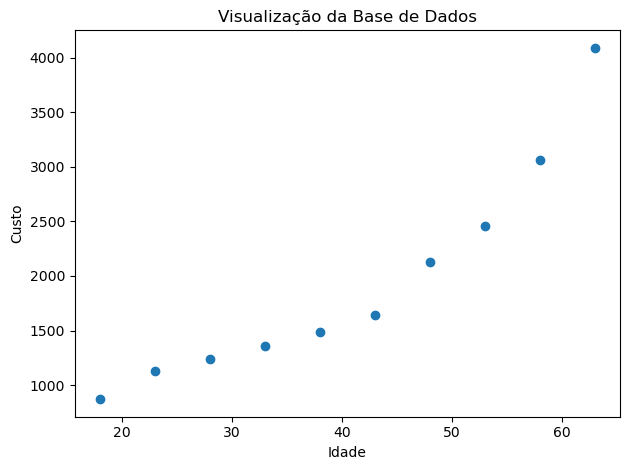

In [4]:
plt.scatter(X_plano_saude, y_plano_saude)
plt.title('Visualização da Base de Dados')
plt.xlabel('Idade')
plt.ylabel('Custo')
plt.tight_layout()

In [5]:
# Coeficiente de Correlação - Return Pearson product-moment correlation coefficients.
np.corrcoef(x=X_plano_saude, y=y_plano_saude)

array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

Da forma que lemos o arquivo, a variável `X_plano_saude` é um array 1D. Para enviarmos ao algoritmo do _sklearn_ é necessário transformar o formato deste array para 2D via `np.reshape`, com $1D \rightarrow 2D$, que equivale a:


In [6]:
print(f"Antes: {X_plano_saude.shape}")
X_plano_saude = X_plano_saude.reshape(-1,1)
X_plano_saude.shape, X_plano_saude.ndim

Antes: (10,)


((10, 1), 2)

In [7]:
# Instaciar o algoritmo
lr_plano_saude = LinearRegression()
lr_plano_saude.fit(X_plano_saude, y_plano_saude)

LinearRegression()

In [8]:
# Coeficiente b0 e b1
lr_plano_saude.intercept_ , lr_plano_saude.coef_

(-558.9490909090907, array([61.86787879]))

In [9]:
# Previsoes do Algoritmo
y_pred = lr_plano_saude.predict(X_plano_saude)
y_pred


array([ 554.67272727,  864.01212121, 1173.35151515, 1482.69090909,
       1792.03030303, 2101.36969697, 2410.70909091, 2720.04848485,
       3029.38787879, 3338.72727273])

Para fazer novamente o _scatter plot_ voltamos a dimensão de `X_plano_saude` para 1D com o método `.ravel()`:  
`arr.ravel([order])` $\rightarrow$ Return a flattened array.



In [15]:
# Scatter Plot - Voltar o formato de vetor para X
X_plano_saude.ravel()

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63], dtype=int64)

In [20]:
# instanciar um grafico do plotly
grafico = px.scatter(x=X_plano_saude.ravel(), y=y_plano_saude)
grafico.add_scatter(x=X_plano_saude.ravel(), y=y_pred, name='Regressão Linear')
grafico.show()


O que está acontecendo com o predict é : $$ y = b_0 + b_1 \cdot x$$  
Traduzindo em código: `lr_plano_saude.intercept_ + lr_plano_saude.coef_* X_i`

In [22]:
## Métrica para avaliar o algoritmo de regressao - Coeficiente de Determinação R²
lr_plano_saude.score(X_plano_saude, y_plano_saude)

0.8666112727879173

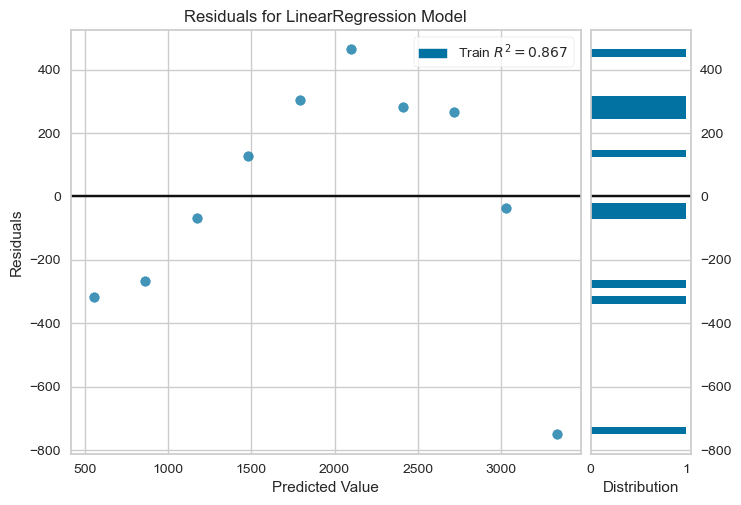

In [27]:
## Distância dos valores originais em relação a regressão
visualizador = ResidualsPlot(estimator=lr_plano_saude)
visualizador.fit(X_plano_saude, y_plano_saude)
visualizador.poof();
